# lignite
lignite - Structural Model Construction with 70-80% Carbon content [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/liuhaodong2021/GenCoal/blob/main/docs/source/examples/lignite.ipynb)

### Install the package from pip (skip this step if the package is already installed)


In [1]:
# ! pip install clipirmol

### Import package

In [2]:
# set coal path (optional if installed via pip)

import sys, os
import json

project_path = os.path.abspath(os.path.join(os.getcwd(), '../../..'))
print(project_path)
sys.path.insert(0, project_path)


# import python file from coal file directory
import coal.utils as ut
import coal.CoalGenerator as gen
import coal.ClipIRMol as clipirmol


['/home/liuhaodong/CoalModel', '/home/liuhaodong/CoalModel/docs/source/examples', '/home/liuhaodong/.conda/envs/clipirmol/lib/python38.zip', '/home/liuhaodong/.conda/envs/clipirmol/lib/python3.8', '/home/liuhaodong/.conda/envs/clipirmol/lib/python3.8/lib-dynload', '', '/home/liuhaodong/.conda/envs/clipirmol/lib/python3.8/site-packages']
/home/liuhaodong/CoalModel/docs/source/examples


In [3]:
### if you don't know elemental proportion in daf, run out this code block to turn ad into daf
C_ad = 78.85  # 碳
N_ad = 1.44   # 氮
H_ad = 6.05  # 氢
S_ad = 0.26  # 硫
M = 2.51   # 水分
A = 1.66   # 灰分

C_daf, N_daf, H_daf, S_daf, O_daf = ut.ad2daf(C_ad, N_ad, H_ad, S_ad, M, A)
print(f"C_daf, N_daf, H_daf, S_daf, O_daf = {C_daf, N_daf, H_daf, S_daf, O_daf}")

O_ad= 9.230000000000004
C_daf, N_daf, H_daf, S_daf, O_daf = (82.28112282166336, 1.5026609621204217, 6.313263070019827, 0.27131378482729834, 9.631639361369096)


In [4]:
ele_ratio = {
        "C": C_daf,
        "H": H_daf,
        "N": N_daf,
        "S": S_daf,
        "O": O_daf
    }
print(ele_ratio)

{'C': 82.28112282166336, 'H': 6.313263070019827, 'N': 1.5026609621204217, 'S': 0.27131378482729834, 'O': 9.631639361369096}


### Import CSV table of <sup>13</sup>C NMR

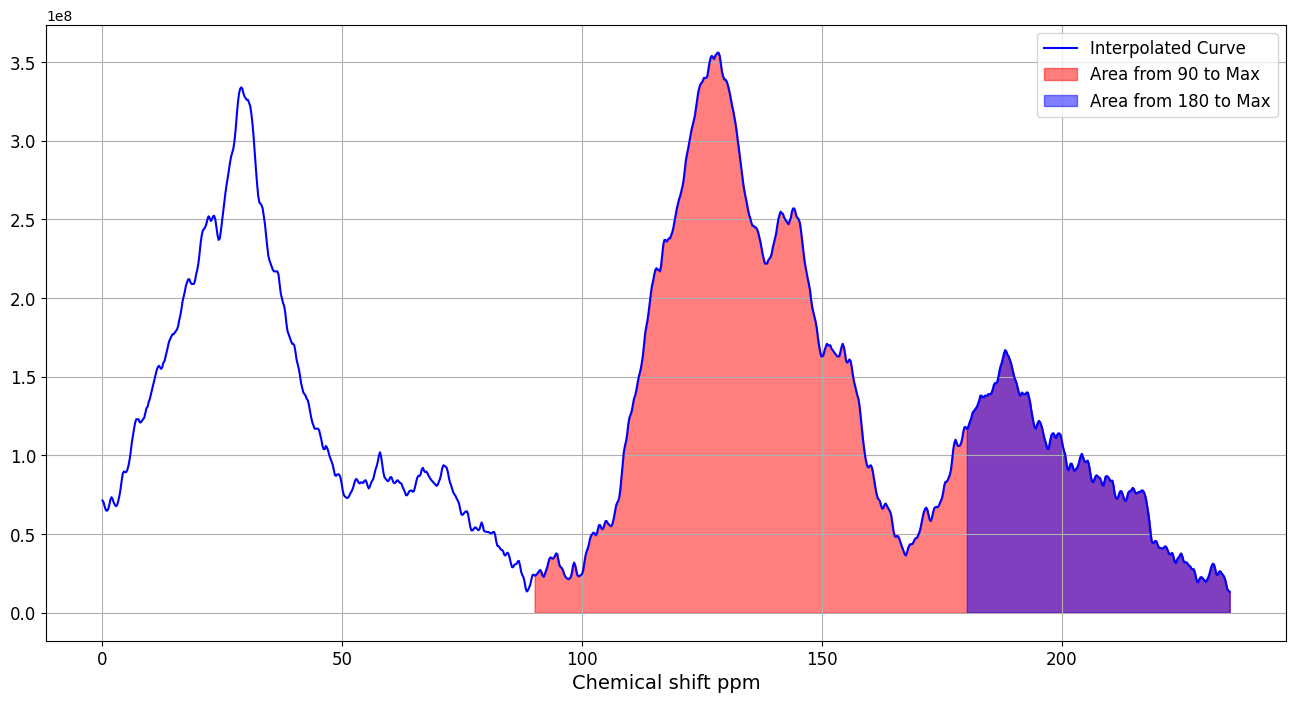

ppm>90 = 0.614 ,ppm>180 = 0.155


In [5]:
NMR_file_path = "lignite/NMR霍林河原煤.csv"
C90, C180 = ut.calculate_C90_C180(NMR_file_path)
print("ppm>90 =", C90, ",ppm>180 =", C180)

### Import CSV table of IR

In [6]:
# 输入红外文件
IR_file_path = 'lignite/IR霍林河原煤.csv'

# 获取分子数据
retrieved_molecules = clipirmol.retrieve_small_molecules(IR_file_path)
# 打印红外光谱检索出来的小分子
# smiles_and_scores = clipirmol.convert_data_to_smiles_scores(retrieved_molecules)
# clipirmol.display_molecules(smiles_and_scores)

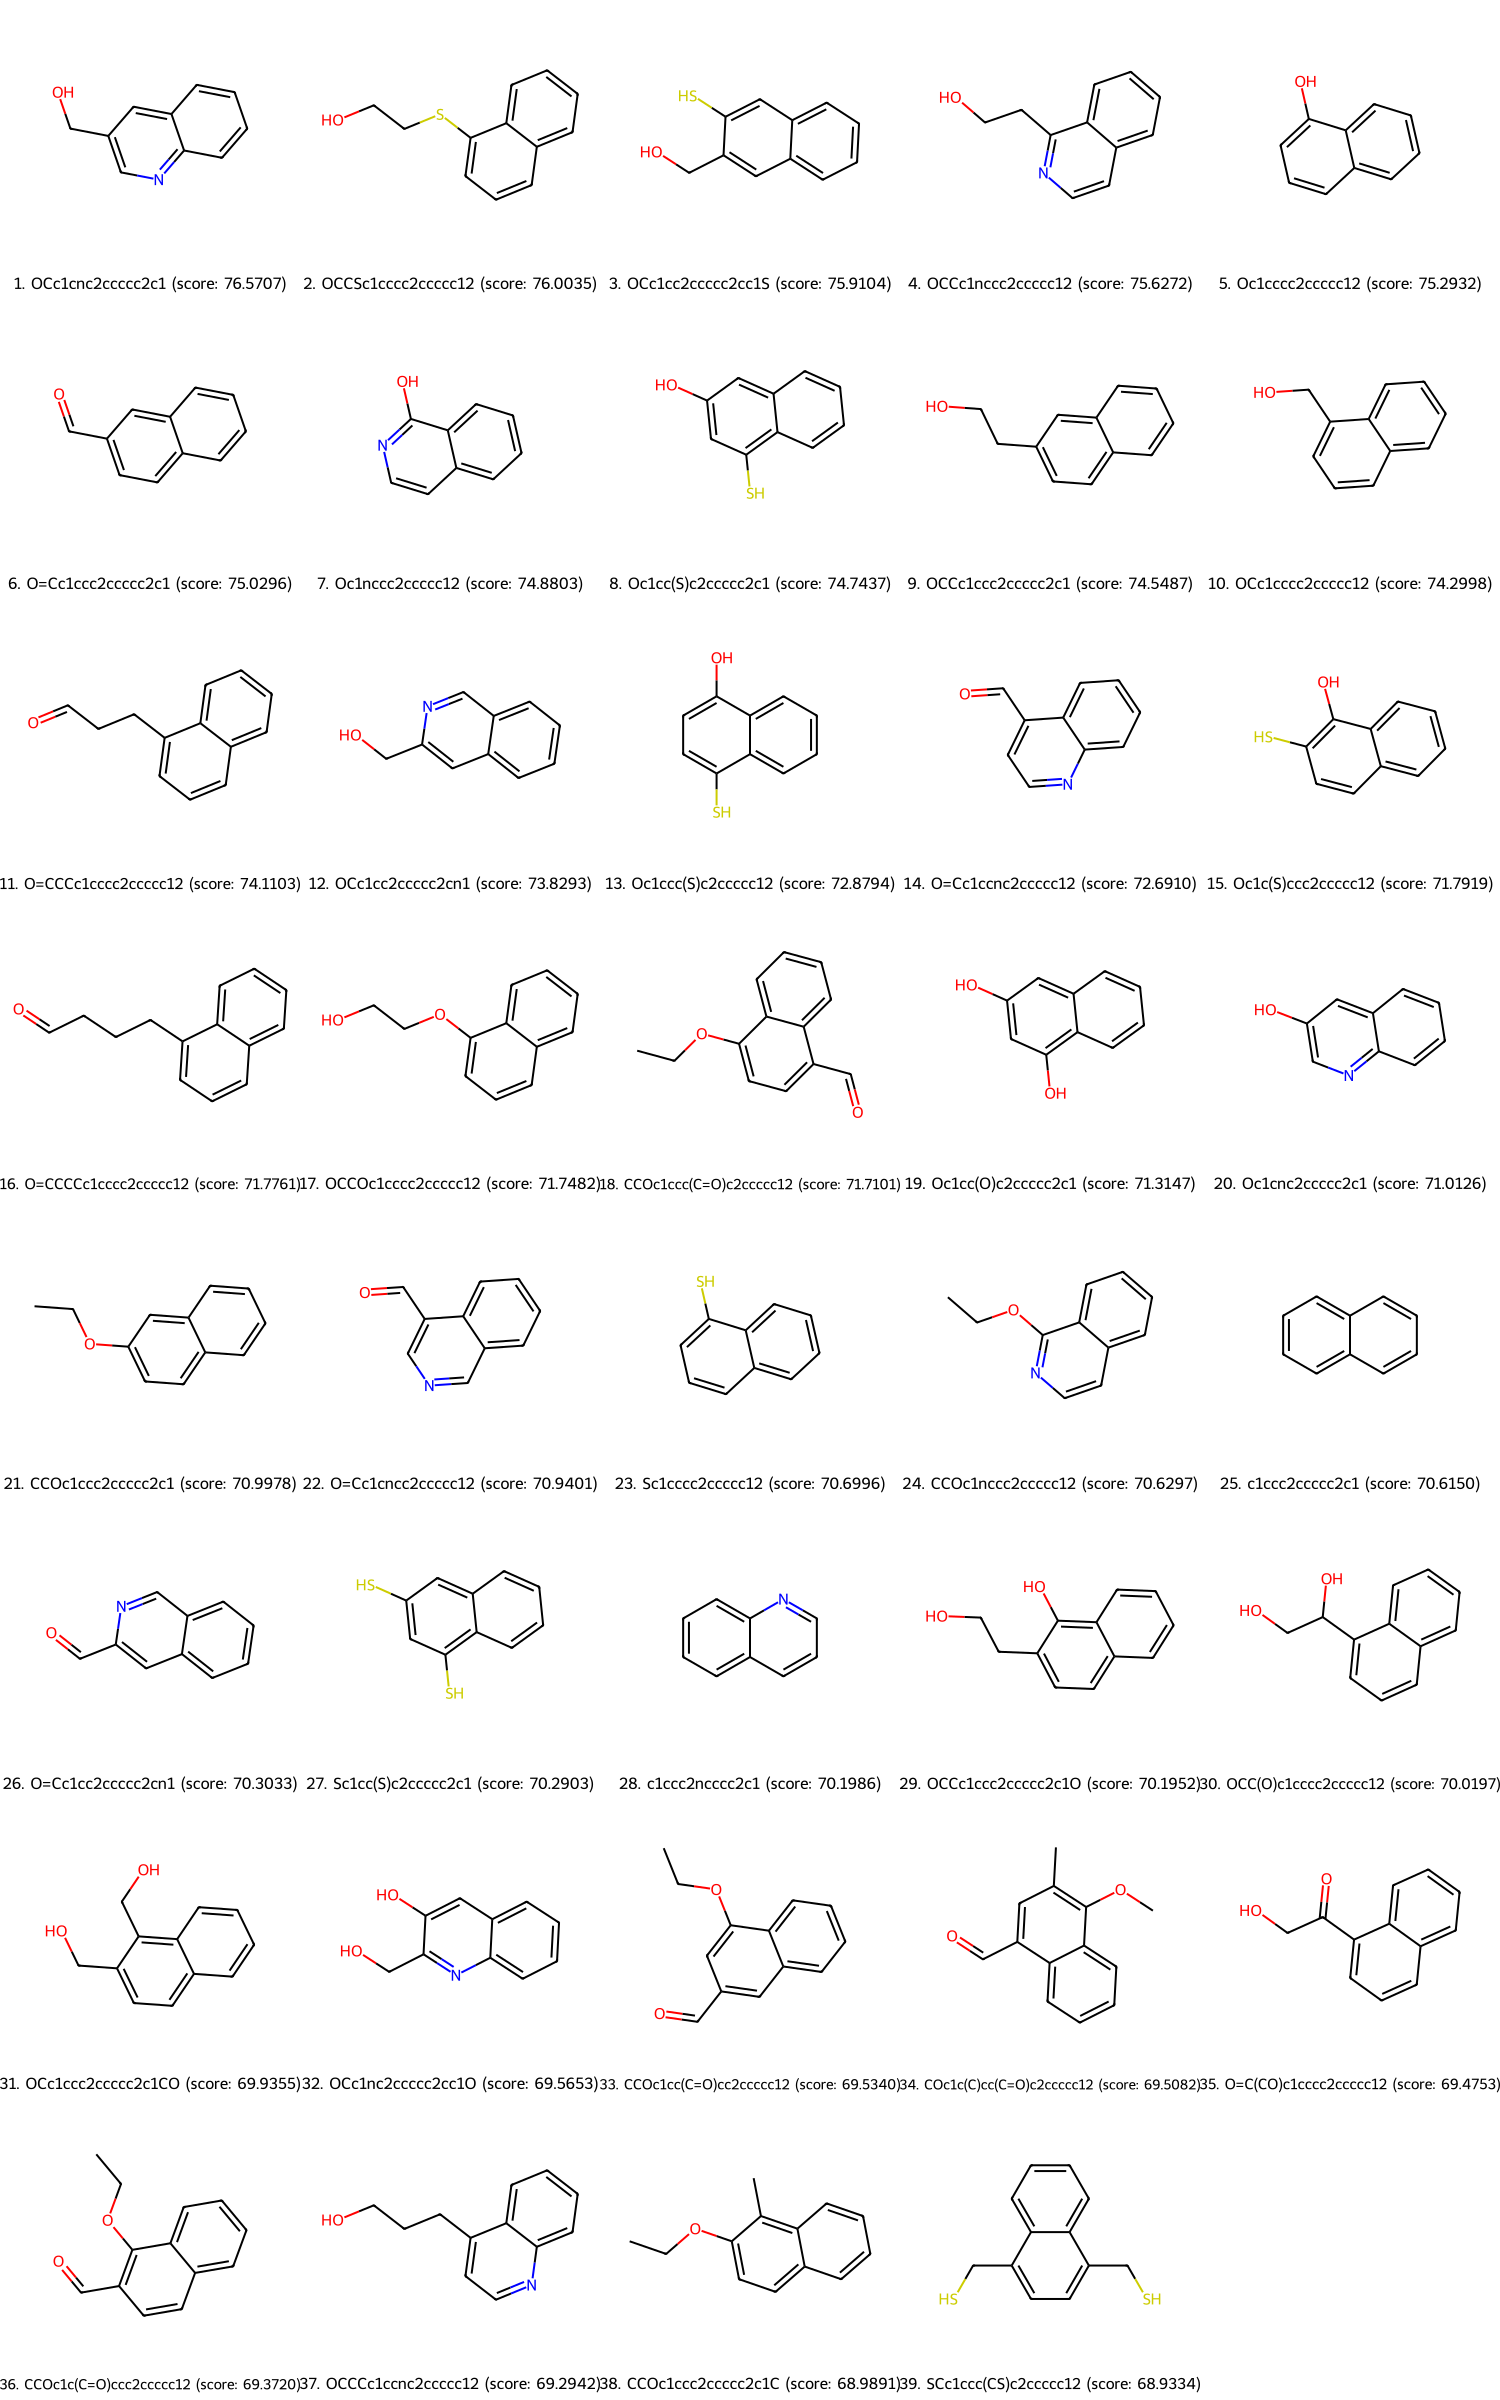

In [7]:
# 从retrieved_molecules获取SMILES字符串
selected_smiles = [mol['smiles'] for mol in retrieved_molecules]
extended_smiles_list = []

# 使用connect_rings_C4函数扩展这些SMILES字符串
for smiles in selected_smiles:
    extended_smiles = clipirmol.connect_rings_C4(smiles)
    extended_smiles_list.append(extended_smiles)

# 更新updated_predicted_smiles_and_scores
updated_predicted_smiles_and_scores = [[(mol['smiles'], mol['score']) for mol in retrieved_molecules]]
for i, (smiles, score) in enumerate(updated_predicted_smiles_and_scores[0]):
    extended_smiles = extended_smiles_list[i]
    updated_predicted_smiles_and_scores[0][i] = (extended_smiles, score)

# clipirmol.display_molecules(updated_predicted_smiles_and_scores[0])

# 过滤SMILES
new_smiles_and_scores = clipirmol.filter_smiles_and_scores(updated_predicted_smiles_and_scores)
new_smiles_and_scores = [new_smiles_and_scores]

# 显示过滤后的图像
clipirmol.display_molecules(new_smiles_and_scores[0]) 

### input molecule scale

In [8]:
# 自己加两环的
coal_smiles_list = selected_smiles + [i[0] for i in new_smiles_and_scores[0]]

# 指定 JSON 文件名
filename = 'lignite.json'

# 读取现有的 JSON 数据
with open(filename, 'r') as file:
    data = json.load(file)

data["C_atom"] = [100,200]

### import lignite.json as input

In [9]:
# 更新 coal_smiles_list 的值
data['coal_smiles_list'] = coal_smiles_list
data['ele_ratio'] = ele_ratio
data['C90'] = C90
data['C180'] = C180

# 将更新后的数据写回 JSON 文件
with open(filename, 'w') as file:
    json.dump(data, file, indent=4)

print("Update input information successfully!")

Update input information successfully!


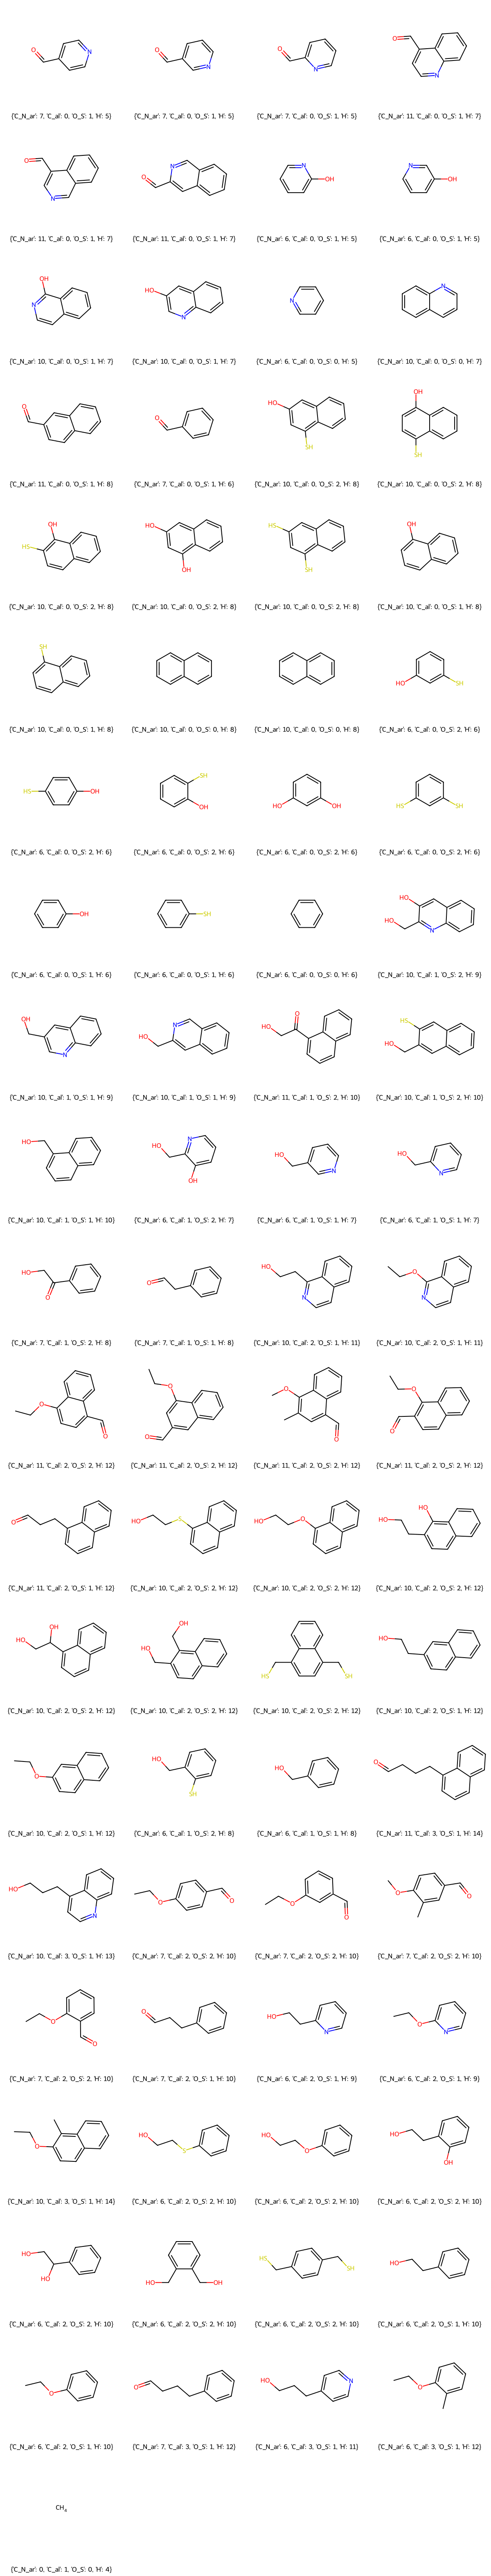

Model has 1 O atom in carbonyl
Model has 2 O atom in hydroxyl
Target lignite coal model with molecular formula C100H91O9N2S0
Target attribute: {'C_N_ar': 63, 'C_al': 39, 'O_S': 6, 'H': 91}
All combinations that meet the target C_N_ar: [{0: 0, 6: 7, 7: 3, 10: 0, 11: 0}, {0: 0, 6: 7, 7: 0, 10: 1, 11: 1}, {0: 0, 6: 6, 7: 1, 10: 2, 11: 0}, {0: 0, 6: 5, 7: 0, 10: 0, 11: 3}, {0: 0, 6: 4, 7: 4, 10: 0, 11: 1}, {0: 0, 6: 4, 7: 1, 10: 1, 11: 2}, {0: 0, 6: 3, 7: 5, 10: 1, 11: 0}, {0: 0, 6: 3, 7: 2, 10: 2, 11: 1}, {0: 0, 6: 2, 7: 3, 10: 3, 11: 0}, {0: 0, 6: 2, 7: 1, 10: 0, 11: 4}, {0: 0, 6: 2, 7: 0, 10: 4, 11: 1}, {0: 0, 6: 1, 7: 5, 10: 0, 11: 2}, {0: 0, 6: 1, 7: 2, 10: 1, 11: 3}, {0: 0, 6: 1, 7: 1, 10: 5, 11: 0}, {0: 0, 6: 0, 7: 9, 10: 0, 11: 0}, {0: 0, 6: 0, 7: 6, 10: 1, 11: 1}, {0: 0, 6: 0, 7: 3, 10: 2, 11: 2}, {0: 0, 6: 0, 7: 0, 10: 3, 11: 3}]
Evaluating combination 1/18
Evaluating combination 2/18
Evaluating combination 3/18
Evaluating combination 4/18
Evaluating combination 5/18
Evaluating c

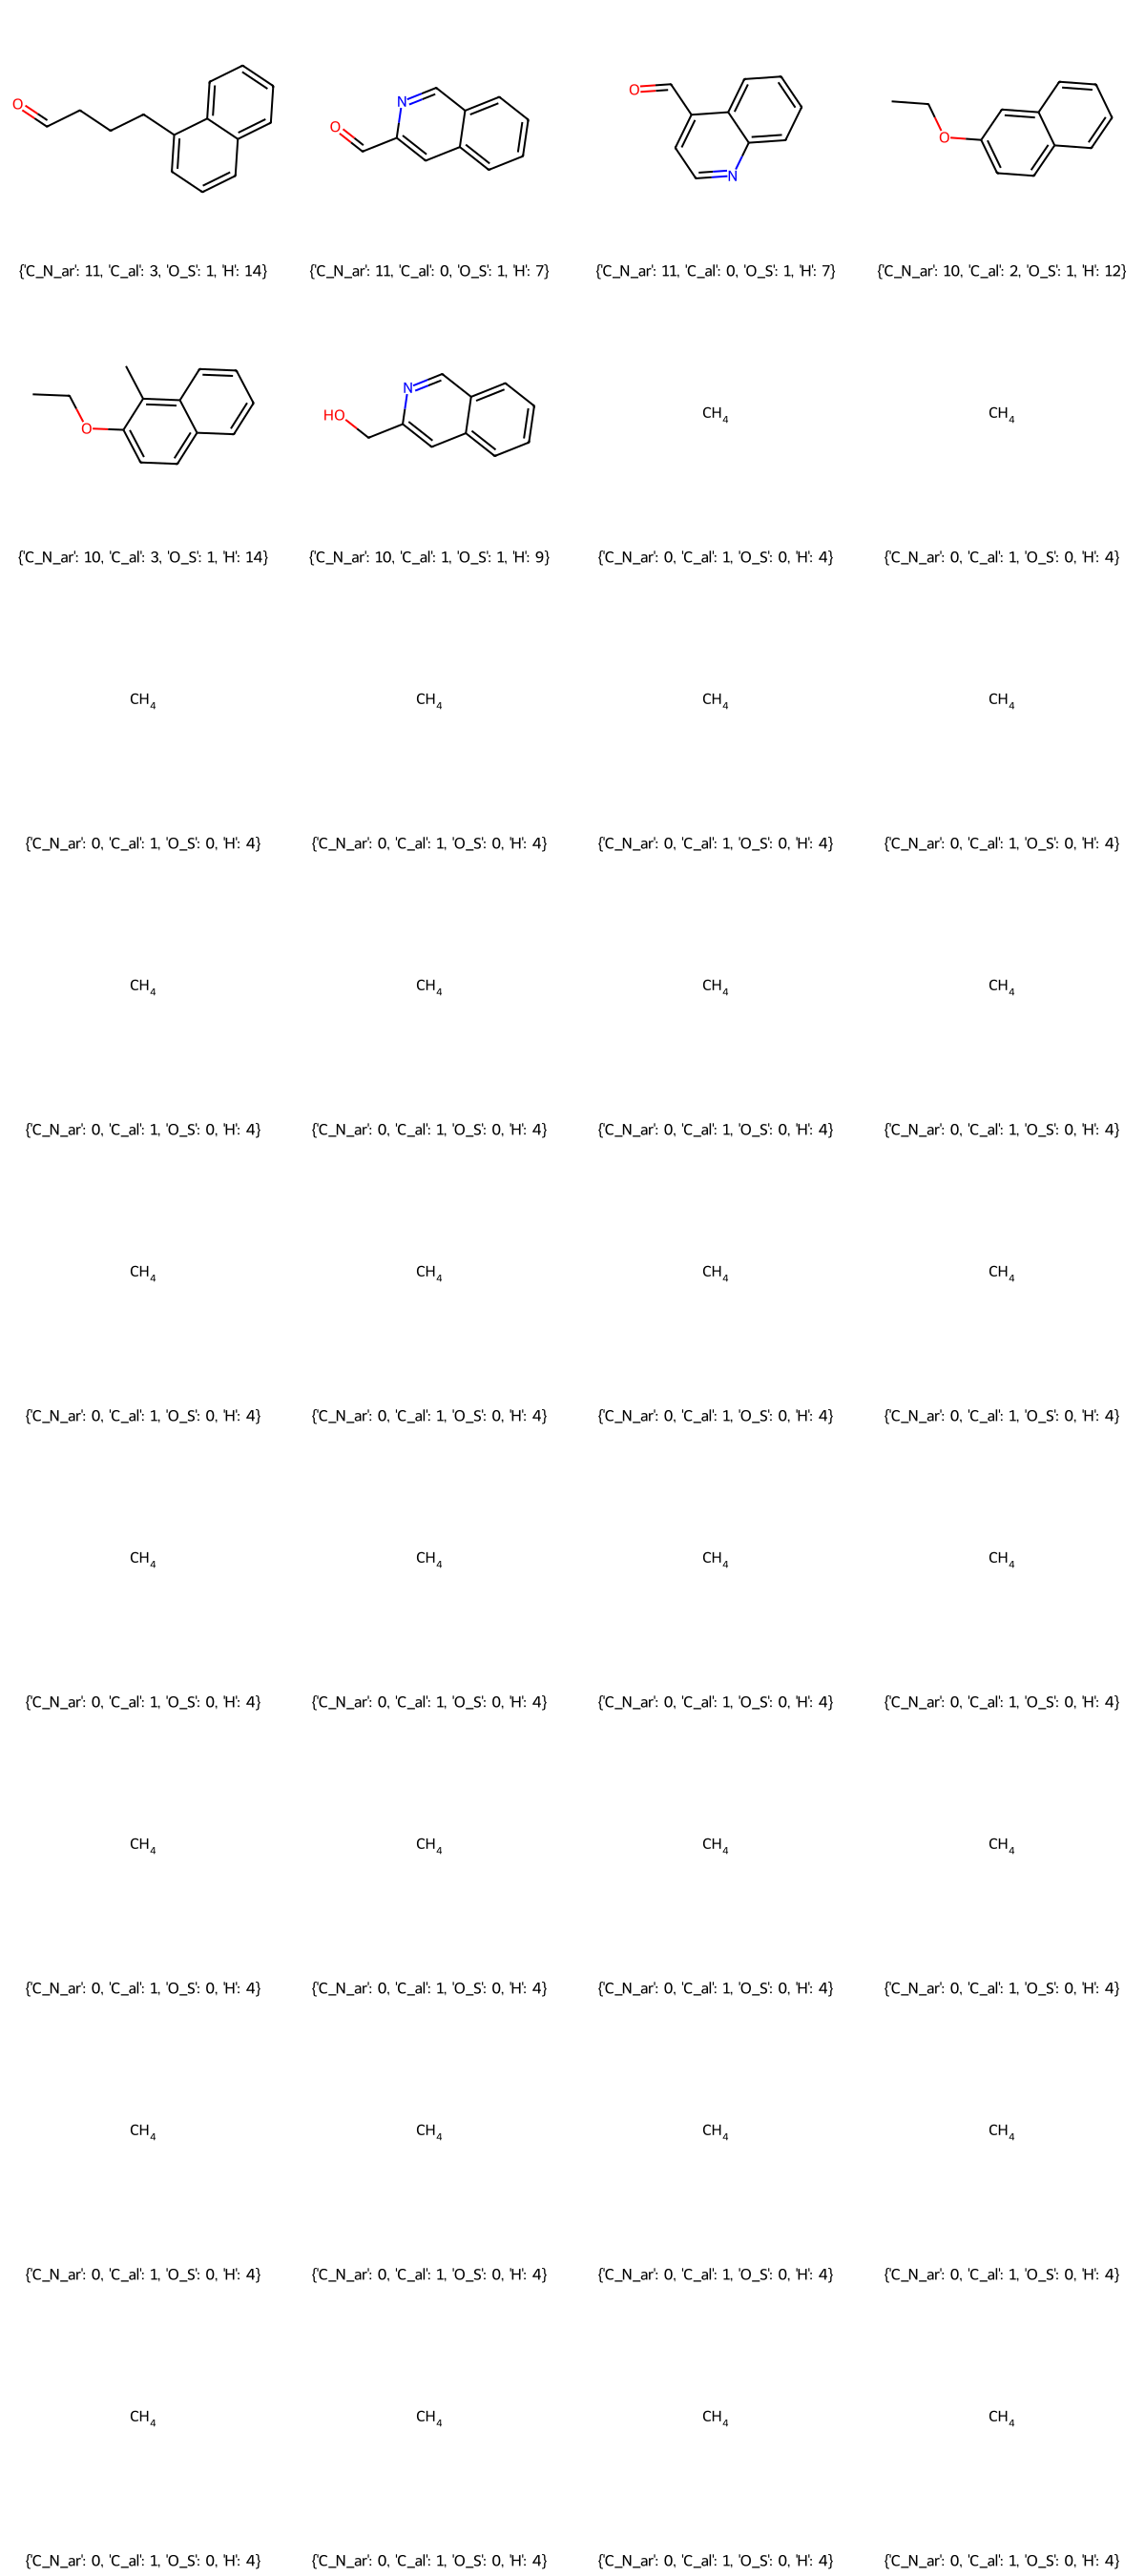

加丙烷前后
['O=CCCCc1cccc2ccccc12', 'O=Cc1cc2ccccc2cn1', 'O=Cc1ccnc2ccccc12', 'CCOc1ccc2ccccc2c1', 'CCOc1ccc2ccccc2c1C', 'OCc1cc2ccccc2cn1'] ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
['O=C1CCCC(Cc2cccc3ccccc23)C1', 'O=C1CCCc2c1ncc1ccccc21', 'O=C1CCCc2cnc3ccccc3c21', 'CCOc1ccc2ccccc2c1', 'CCOc1ccc2ccccc2c1C', 'OCc1cc2ccccc2cn1'] ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']


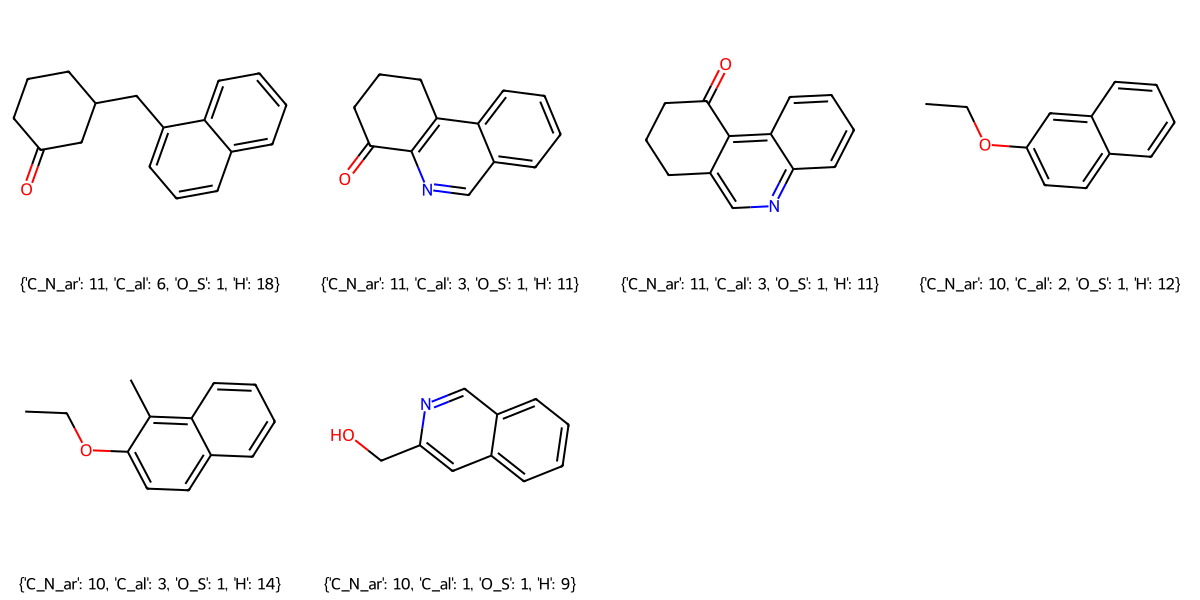

Before connect: {'C': 30, 'H': 29, 'O': 2, 'N': 1, 'S': 0}, After connect: {'C': 32, 'H': 29, 'O': 2, 'N': 1, 'S': 0}
Before connect: {'C': 23, 'H': 23, 'O': 2, 'N': 1, 'S': 0}, After connect: {'C': 25, 'H': 23, 'O': 2, 'N': 1, 'S': 0}
Before connect: {'C': 25, 'H': 23, 'O': 2, 'N': 1, 'S': 0}, After connect: {'C': 27, 'H': 23, 'O': 2, 'N': 1, 'S': 0}
Remaining 'C' in list2: 15
methane_count:21
SMILES component list: {'C': 99, 'H': 135, 'O': 6, 'N': 3, 'S': 0}
连接前的检查 {'C': 99, 'H': 105, 'O': 6, 'N': 3, 'S': 0}
Predicted SMILES is CCOc1cc2ccc3c(c2c2c1Cc1cc4cnc5c(c4cc1C2)CCC(C1CCc2cnc4ccc6c(c4c2C1=O)Cc1cc2c(CC4CC7CCCCC7C(=O)C4C)cccc2cc1C6C)C5=O)CCCC3OC(C)c1cc2ccc3c(c2cn1)Cc1c(c(OCC)c(C)c2cc4c(cc12)CCCC4)C3
Predicted Chemical Fomula of final coal model is C99H95O6N3S0
不饱和碳原子数量: 60
Unsatutated carbon rate of final coal model is 0.6060606060606061
Predicted elemental ratio of coal model is: {'C': 83.56808501665753, 'H': 6.730485387761988, 'O': 6.747353772192469, 'N': 2.954075823388015, 'S':

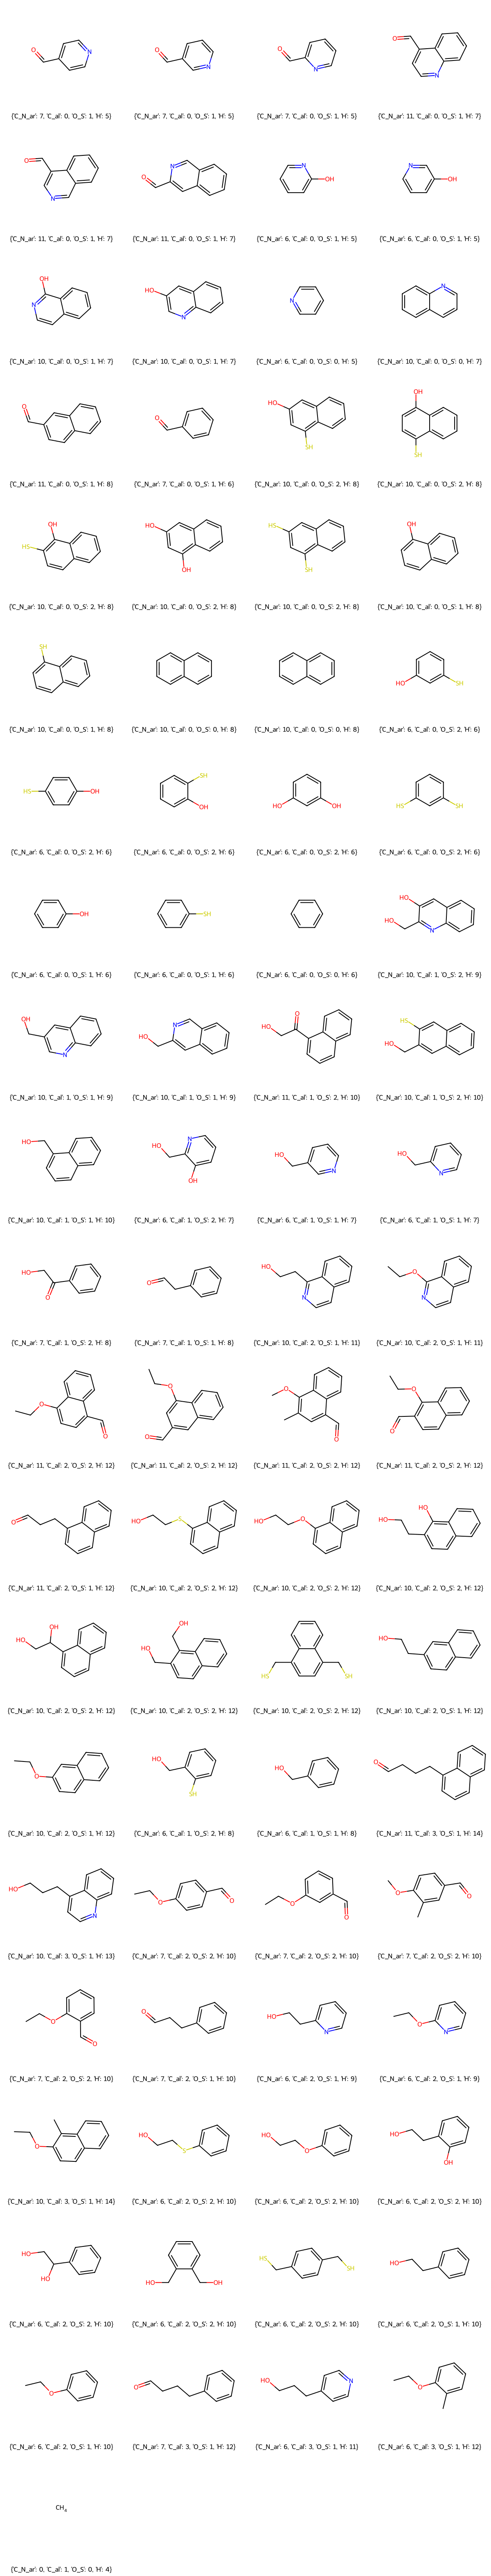

Model has 2 O atom in carbonyl
Model has 4 O atom in hydroxyl
Target lignite coal model with molecular formula C200H183O18N3S0
Target attribute: {'C_N_ar': 126, 'C_al': 77, 'O_S': 12, 'H': 183}
All combinations that meet the target C_N_ar: [{0: 0, 6: 21, 7: 0, 10: 0, 11: 0}, {0: 0, 6: 18, 7: 1, 10: 0, 11: 1}, {0: 0, 6: 17, 7: 2, 10: 1, 11: 0}, {0: 0, 6: 16, 7: 0, 10: 3, 11: 0}, {0: 0, 6: 15, 7: 2, 10: 0, 11: 2}, {0: 0, 6: 14, 7: 6, 10: 0, 11: 0}, {0: 0, 6: 14, 7: 3, 10: 1, 11: 1}, {0: 0, 6: 14, 7: 0, 10: 2, 11: 2}, {0: 0, 6: 13, 7: 4, 10: 2, 11: 0}, {0: 0, 6: 13, 7: 1, 10: 3, 11: 1}, {0: 0, 6: 12, 7: 3, 10: 0, 11: 3}, {0: 0, 6: 12, 7: 2, 10: 4, 11: 0}, {0: 0, 6: 12, 7: 0, 10: 1, 11: 4}, {0: 0, 6: 11, 7: 7, 10: 0, 11: 1}, {0: 0, 6: 11, 7: 4, 10: 1, 11: 2}, {0: 0, 6: 11, 7: 1, 10: 2, 11: 3}, {0: 0, 6: 11, 7: 0, 10: 6, 11: 0}, {0: 0, 6: 10, 7: 8, 10: 1, 11: 0}, {0: 0, 6: 10, 7: 5, 10: 2, 11: 1}, {0: 0, 6: 10, 7: 2, 10: 3, 11: 2}, {0: 0, 6: 10, 7: 0, 10: 0, 11: 6}, {0: 0, 6: 9, 7: 6, 10: 3

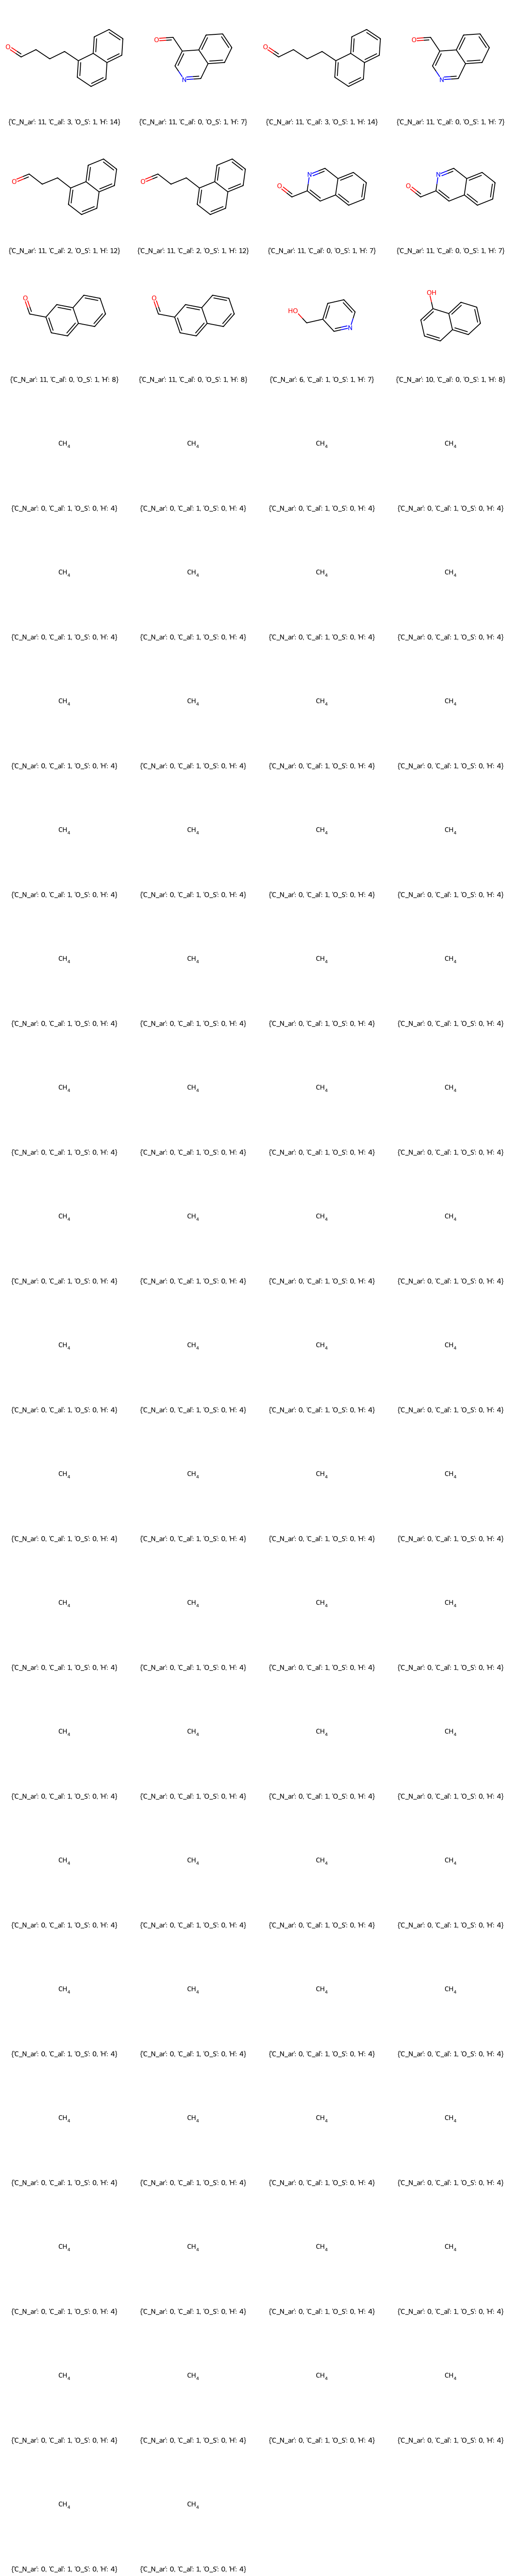

加丙烷前后
['O=CCCCc1cccc2ccccc12', 'O=Cc1cncc2ccccc12', 'O=CCCCc1cccc2ccccc12', 'O=Cc1cncc2ccccc12', 'O=CCCc1cccc2ccccc12', 'O=CCCc1cccc2ccccc12', 'O=Cc1cc2ccccc2cn1', 'O=Cc1cc2ccccc2cn1', 'O=Cc1ccc2ccccc2c1', 'O=Cc1ccc2ccccc2c1', 'OCc1cccnc1', 'Oc1cccc2ccccc12'] ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
['O=C1CCCC(Cc2cccc3ccccc23)C1', 'O=C1CCCc2ncc3ccccc3c21', 'O=C1CCCC(Cc2cccc3ccccc23)C1', 'O=C1CCCc2ncc3ccccc3c21', 'O=C1CCCC(c2cccc3ccccc23)C1', 'O=C1CCCC(c2cccc3ccccc23)C1', 'O=C1CCCc2c1ncc1ccccc21', 'O=C1CCCc2c1ncc1ccccc21', 'O=C1CCCc2cc3ccccc3cc21', 'O=C1CCCc2cc3ccccc3cc21', 'OCc1cccnc1', 'Oc1cccc2ccccc12'] ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', '

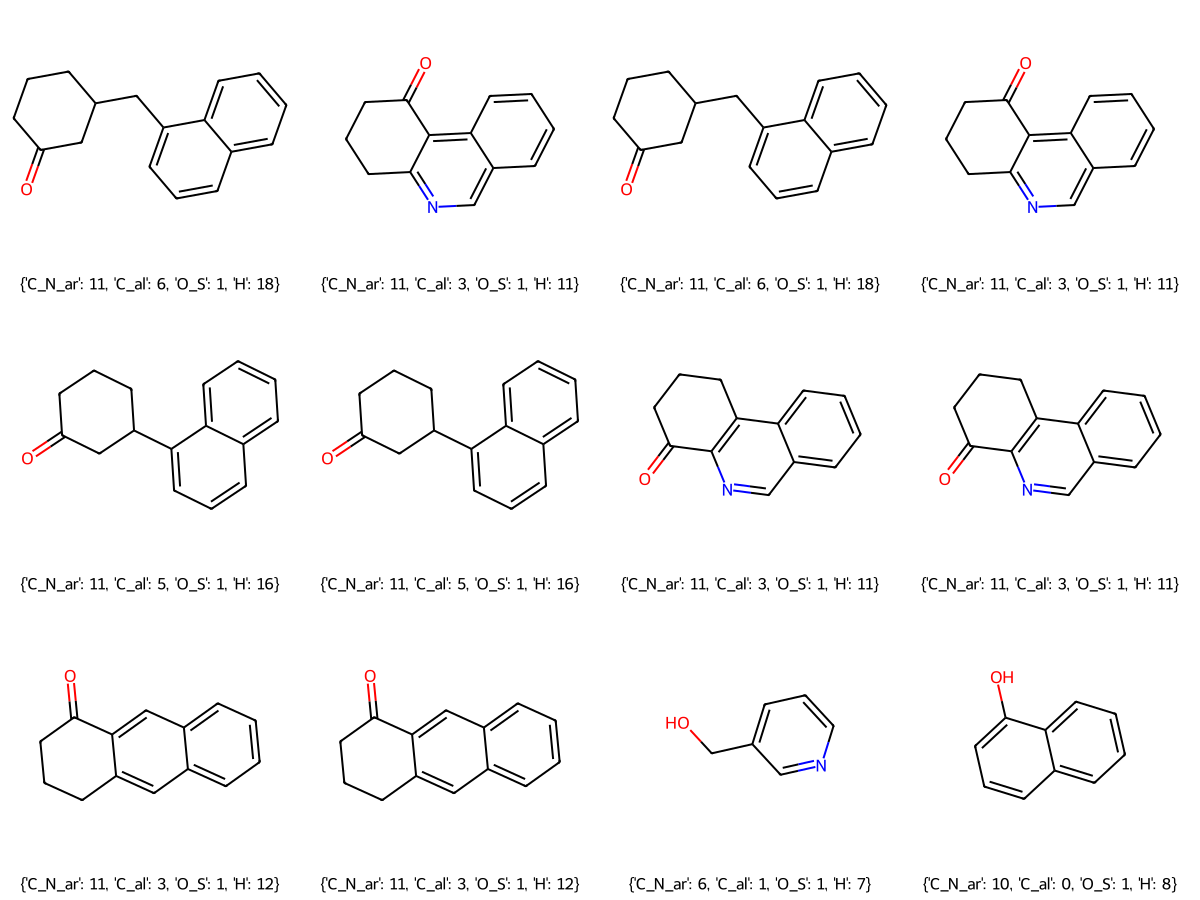

Before connect: {'C': 24, 'H': 20, 'O': 2, 'N': 0, 'S': 0}, After connect: {'C': 26, 'H': 20, 'O': 2, 'N': 0, 'S': 0}
Before connect: {'C': 30, 'H': 28, 'O': 2, 'N': 0, 'S': 0}, After connect: {'C': 32, 'H': 28, 'O': 2, 'N': 0, 'S': 0}
Before connect: {'C': 30, 'H': 29, 'O': 2, 'N': 1, 'S': 0}, After connect: {'C': 32, 'H': 29, 'O': 2, 'N': 1, 'S': 0}
Before connect: {'C': 26, 'H': 22, 'O': 2, 'N': 2, 'S': 0}, After connect: {'C': 28, 'H': 22, 'O': 2, 'N': 2, 'S': 0}
Before connect: {'C': 29, 'H': 27, 'O': 2, 'N': 1, 'S': 0}, After connect: {'C': 31, 'H': 27, 'O': 2, 'N': 1, 'S': 0}
Before connect: {'C': 23, 'H': 25, 'O': 2, 'N': 1, 'S': 0}, After connect: {'C': 25, 'H': 25, 'O': 2, 'N': 1, 'S': 0}
Remaining 'C' in list2: 24
methane_count:36
SMILES component list: {'C': 198, 'H': 247, 'O': 12, 'N': 5, 'S': 0}
连接前的检查 {'C': 198, 'H': 207, 'O': 12, 'N': 5, 'S': 0}
Predicted SMILES is CC1CCc2ncc3c4c(c5c(c3c2C1=O)CCCC5)Cc1ccc2c(CC3CCC(C)C(=O)C3C3C(=O)C(C5C(=O)c6c(ncc7cc8c(cc67)Cc6ccc7c9c(nc

In [10]:
## 读文件
data = ut.read_json('lignite.json')

generator = gen.CoalGenerator(data)
current_smiles_list = generator.run()

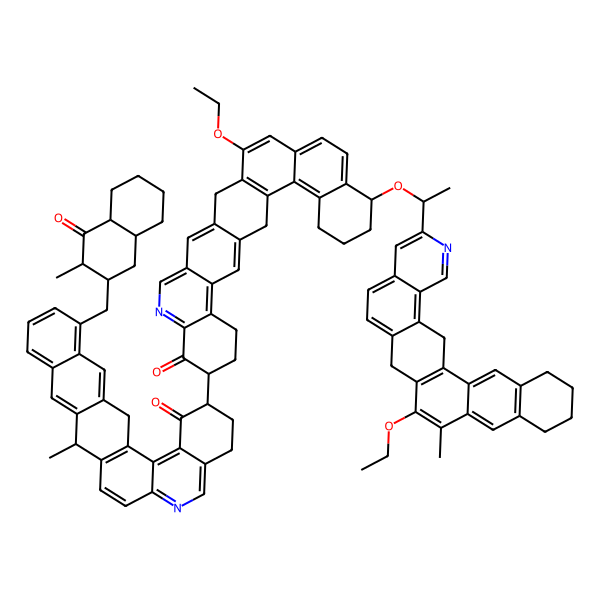

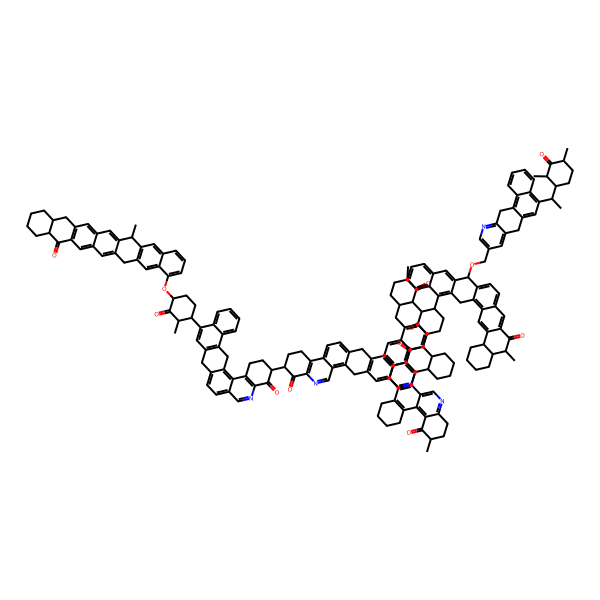

In [11]:
for smiles in current_smiles_list:
    ut.drawMolecule(smiles)

### checking revised molecule model

In [12]:
ratio = ut.calculate_unsaturated_carbon_ratio("CC1CCc(c(C1=O)cc2)c3c2c4c(Cc(cc5)c(C4)c6c5c7c(C(CC(C7=O)C8CCc(cn9)c(C8=O)c%10c9c%11c(C(c(c%12)c(C%11)cc%13c%12c%14c(CCC(C%14=O)C%15CCC(C(C%15=O)C)c(cc%16)cc%17c%16c%18c(Cc(c(C%18)c(COC%19CCc(cc%20)c(C%19=O)c%21c%20cc%22c(Cc(c(C%22)cc%23)c%24c%23cccc%24C(C%25CCC(C(C%25C%26CCc(c(C%26=O)c%27c%28Cc(c%29)c(C%27)cc%30c%29c(CC%31CCC(C(C%31C)=O)C)cc%32c%30CCCC%32)c%33c%28cccc%33)=O)OCC%34CCCCC%34c%35c(Cc(c(C%36)cc%37)c%38c%37ccc(C%39CCC(C(C%39C)=O)C)c%38)c%36ncc%35)C)c%21)n%40)c%41c%40c%42c(CCCC%42)cc%41)cc%17)cn%13)C)cc%10)C)nc6)cc3")
print("Unsatutated carbon rate of final coal model is", ratio)

不饱和碳原子数量: 121
Unsatutated carbon rate of final coal model is 0.6111111111111112
